# Case Study

**From now we assume that the model is ground truth.**

In [ ]:
# Generate the new dataset with 2025, you want to upload them all so scaling matches with previous seasons.
import os
case_study_set = CustomF1Dataloader(f"{os.getcwd()}/datasets")
torch.save(case_study_set, "case_study_dataset.pt")

Loading /content/datasets/dataset2021.csv
Loading /content/datasets/dataset2018.csv
Loading /content/datasets/dataset2019.csv
Loading /content/datasets/dataset2025.csv
Loading /content/datasets/dataset2024.csv
Loading /content/datasets/dataset2022.csv
Loading /content/datasets/dataset2020.csv
Loading /content/datasets/dataset2023.csv
EventName              Driver
Australian Grand Prix  1         2.435546
                       3         2.431948
                       4         2.430112
                       10        2.433951
                       12        1.951685
                       15        2.432904
                       16        2.376239
                       18        2.438182
                       21        2.425056
                       22        2.441028
                       23        0.000000
                       26        2.436885
                       27        1.323883
                       30        2.428413
                       34        2.432348
    

### Issues with dataset:

| LapNumber  | Sector1Time | Sector2Time | Sector3Time | LapTime |
|------------|------------|------------|------------|---------|
| 1          | 20         | 3          | 3          | 3       |
| 2          | 0          | 0          | 0          | 20      |
| 3          | 0          | 0          | 0          | 20      |
| 4          | 0          | 0          | 0          | 20      |

The dataset above and the missing values, full table not attached.
Yuki has these lap times missing - but **LapTime = Sector1Time + Sector2Time + Sector3Time**.  
And at this point Hadjar (Formation Lap), Sainz (Lap 2), Doohan (Lap 2) had crashed.  
For this analysis, we will generate missing lap times through this equation.
In order to verify, we will ordered the lap times and compare them againist the offical f1 website.
We scaled it with the other data (MinMax)

### Australian Grand Prix - Ordered Lap Times (Lowest to Highest)

| Driver | Lap Time |
|--------|----------|
| NOR    | 2.425056 |
| VER    | 2.425410 |
| RUS    | 2.428413 |
| ANT    | 2.429067 |
| ALB    | 2.430112 |
| STR    | 2.431948 |
| HUL    | 2.432348 |
| LEC    | 2.432904 |
| PIA    | 2.376239 -> 2.43314 |
| HAM    | 2.433951 |
| GAS    | 2.435546 |
| TSU    | 2.436885 |
| OCO    | 2.438182 |
| BEA    | 2.441028 |
| ALO    | NC       |
| LAW    | NC       |
| SAI    | NC       |
| DOO    | NC       |
| HAD    | NC       |
| BOR    | NC       |

Had blanks in Sector1Time/2/3 in piastris time which might cause the inconsistancy within him, but we can work backwards to get his time

We are looking at 2025, the season had not started at the time of starting model development.

We are going to look at times when we think that teams "could" have done a better strategy using inference from interviews and press.

Yuki Post Race Interview "i did my best but the weather did not come towards us and the timing and everything" (https://www.youtube.com/watch?v=AIG_Fm7cd68)

Racing Bulls looked in great shape heading into Sunday’s race, Yuki Tsunoda having scored their best-ever start in Melbourne since 2015 with P5 – while rookie Isack Hadjar had qualified a strong P11. Then it all went wrong as a decision to stay out a lap too long, and a spin, dropped Tsunoda out of the top-10 and he ultimately crossed the line 12th. (https://www.formula1.com/en/latest/article/5-winners-and-5-losers-from-australia-who-started-their-season-in-style.1G1Mj3WZABn0xxWqwC6Z16)

* Pit stop
* What happened if we had a SC free race (we had 4 in total).

In [ ]:
# Ensure to upload the relevent classes here.
model = AutoF1GRU(INPUT_SIZE, HIDDEN_SIZE)
model.load_state_dict(torch.load('yuki/model_weights_9.pth'))
model.to(device)

FinalAutoF1GRU(
  (team_embedding): Embedding(10, 8)
  (track_status_embedding): Embedding(8, 8)
  (driver_embedding): Embedding(40, 8)
  (compound_embedding): Embedding(5, 8)
  (status_embedding): Embedding(5, 8)
  (gear_embedding): Embedding(9, 8)
  (gru): GRU(111, 256, num_layers=2, dropout=0.3)
  (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (compound_prediction): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=5, bias=True)
  )
  (lap_time_prediction): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
  (speedi1_prediction): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=256, out_feat

In [ ]:
print(case_study_set[0][:,13])

tensor([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])


In [ ]:
print(case_study_set[0][:,-15]) # Rainfall

tensor([0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.])


In [ ]:
model.eval()  # Set the model to evaluation mode
TRY_PIT_AT = [46, 47, 48, 49, 50, 51, 52, 53, 54] # YUKI PITTED LAP 50 -4/+4

yuki_australia_2025 = case_study_set[0]
yuki_australia_2025 = yuki_australia_2025.to(device)

INDEX_MAPPING = {
      -8: 'compound_decision',
      0: 'lap_time',
      1: 'speedi1',
      2: 'speedi2',
      3: 'speedfl',
      4: 'speedst',
      5: 'speed_telemetry',
      -10: 'gear_telemetry',
      6: 'rpm_telemetry',
      7: 'throttle_telemetry',
      11: 'd_ahead',
      12: 'd_behind',
      # 13: 'pit_decision',
    }

lap_time_total = {}

for pit_lap in TRY_PIT_AT:
    h_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)
    c_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)

    lap_time_simulated = 0

    for lap in range(yuki_australia_2025.shape[0]):
      current_lap = yuki_australia_2025[lap, :]
      current_lap = current_lap.to(device)
      if lap > pit_lap:
        lap_time_simulated += lap_time.item()
      else:
        lap_time_simulated += current_lap[0]
      if lap == pit_lap:
        current_lap[13] = 1.0
      if lap >= pit_lap:
        for idx in INDEX_MAPPING.keys():
               autoregressed_value = locals()[INDEX_MAPPING[idx]]
               if idx == -8:
                  current_lap[idx] = 3.0
               elif idx == -10:
                  current_lap[idx] = torch.argmax(F.softmax(autoregressed_value, dim=-1), dim=-1).item()
               else:
                  current_lap[idx] = autoregressed_value.item()
      h_s, compound_decision, lap_time, speedi1, speedi2, speedfl, speedst, speed_telemetry, rpm_telemetry, gear_telemetry, throttle_telemetry, d_ahead, d_behind, _ = model(current_lap.unsqueeze(0).unsqueeze(0), h_s)

    lap_time_total[pit_lap] = lap_time_simulated.item()


In [ ]:
2.436885 / lap_time_total[50] # How to scale up to match real life

1.1099535911654048

In [ ]:
scaled_lap_time_total = {k: (v if k == 42 else (lambda x: x * 1.1099535911654048)(v)) for k, v in lap_time_total.items()}

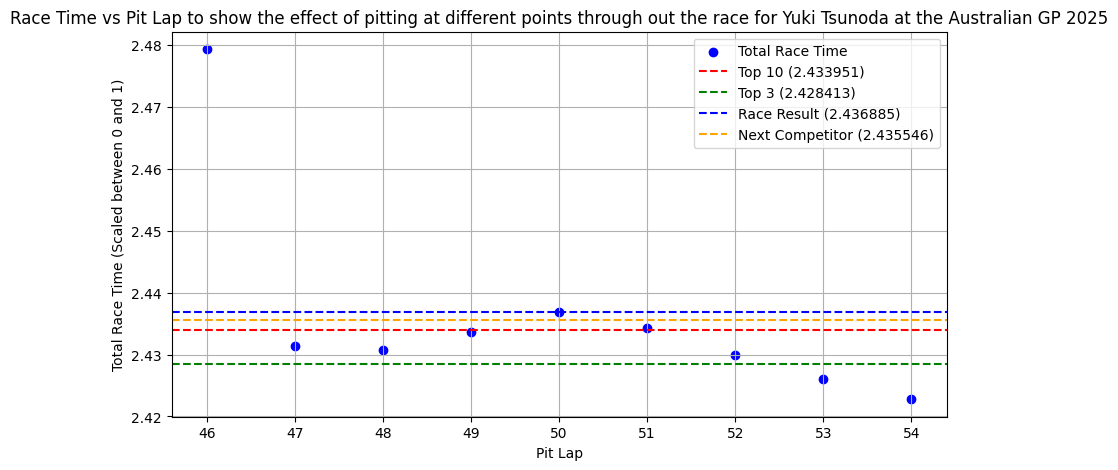

In [ ]:
laps = list(scaled_lap_time_total.keys())
times = list(scaled_lap_time_total.values())

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(laps, times, color='b', label="Total Race Time")  # Scatter plot instead of line plot

# Add horizontal reference lines
plt.axhline(y=2.433951, color='r', linestyle='--', label="Top 10 (2.433951)")
plt.axhline(y=2.428413, color='g', linestyle='--', label="Top 3 (2.428413)")
plt.axhline(y=2.436885, color='b', linestyle='--', label="Race Result (2.436885)")  # Race result line
plt.axhline(y=2.435546, color='orange', linestyle='--', label="Next Competitor (2.435546)")  # Next competitor line

# Labels and title
plt.xlabel("Pit Lap")
plt.ylabel("Total Race Time (Scaled between 0 and 1)")
plt.title("Race Time vs Pit Lap to show the effect of pitting at different points through out the race for Yuki Tsunoda at the Australian GP 2025")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print()

He said he struggled with conditions, what happens if it was a perfect race. What percentage of an increase in time, would we have.

In [ ]:
model.eval()  # Set the model to evaluation mode
TRY_PIT_AT = [38, 29, 40, 41, 42, 43, 44, 45, 46] # YUKI PITTED LAP 42 -4/+4

yuki_australia_2025 = case_study_set[0]
yuki_australia_2025 = yuki_australia_2025.to(device)

INDEX_MAPPING = {
      #-8: 'compound_decision',
      0: 'lap_time',
      1: 'speedi1',
      2: 'speedi2',
      3: 'speedfl',
      4: 'speedst',
      5: 'speed_telemetry',
      -10: 'gear_telemetry',
      6: 'rpm_telemetry',
      7: 'throttle_telemetry',
      11: 'd_ahead',
      12: 'd_behind',
      # 13: 'pit_decision',
    }

lap_times = [yuki_australia_2025[0, 0].item()]

h_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)
c_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)
yuki_australia_2025[:, -6] = 1.0 # Making it a clear race.
yuki_australia_2025[:, -5] = 0.0
yuki_australia_2025[:, -4] = 0.0
yuki_australia_2025[:, -3] = 0.0
yuki_australia_2025[:, -2] = 0.0
yuki_australia_2025[:, 30] = 1.0 # It was a wet race.

current_lap = yuki_australia_2025[lap, :]
current_lap = current_lap.to(device)

for lap in range(yuki_australia_2025.shape[0]):
    h_s, compound_decision, lap_time, speedi1, speedi2, speedfl, speedst, speed_telemetry, rpm_telemetry, gear_telemetry, throttle_telemetry, d_ahead, d_behind, _ = model(current_lap.unsqueeze(0).unsqueeze(0), h_s)

    # Need up to date static information.
    previous_lap = current_lap.clone()
    current_lap = yuki_australia_2025[lap, :].clone()

    # Start to prepare next laps inputs.
    for idx in INDEX_MAPPING.keys():
        autoregressed_value = locals()[INDEX_MAPPING[idx]]
        if idx == -8 or idx == -10:
          current_lap[idx] = torch.argmax(F.softmax(autoregressed_value, dim=-1), dim=-1).item()
        elif idx == 13:
          autoregressed_value = int(F.sigmoid(autoregressed_value).item() >= 0.5)
        else:
          current_lap[idx] = autoregressed_value.item()

    # Tyre Life variable calculation
    if previous_lap[13].item() == 1.0:
      current_lap[14] = 1.0
    else:
      current_lap[14] = previous_lap[14].item() + 1

    lap_times.append(lap_time.item())

lap_times = [lap_time * 1.1047941803182826 for lap_time in lap_times]

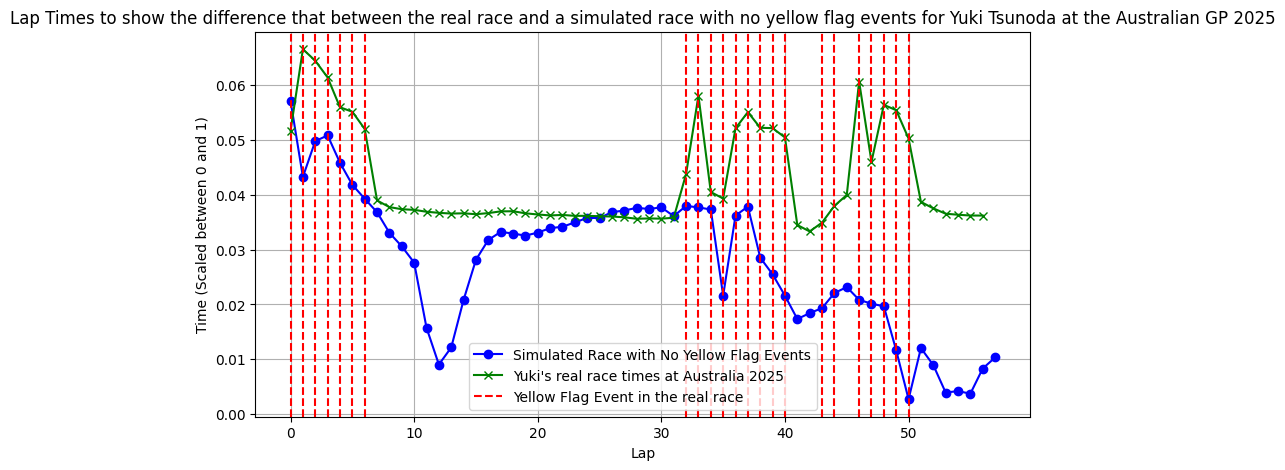

In [ ]:
# Create a plot with two lines
plt.figure(figsize=(10, 5))

# Plot lap_times
plt.plot(lap_times, label="Simulated Race with No Yellow Flag Events", color='b', linestyle='-', marker='o')

# Plot yuki_australia_2025[:, 0]
plt.plot(yuki_australia_2025.cpu().numpy()[:, 0], label="Yuki's real race times at Australia 2025", color='g', linestyle='-', marker='x')

for i in range(len(case_study_set[0])):
    # Check if any of the values in the specified columns are not 1.0 or 2.0
    if np.isin(case_study_set[0][i, -6:-1].cpu().numpy(), [2.0, 4.0, 5.0, 6.0]).any():
        plt.axvline(x=i, color='r', linestyle='--', label="Yellow Flag Event in the real race" if i == 0 else "")

# Add labels and title
plt.xlabel("Lap")
plt.ylabel("Time (Scaled between 0 and 1)")
plt.title("Lap Times to show the difference that between the real race and a simulated race with no yellow flag events for Yuki Tsunoda at the Australian GP 2025")
plt.legend()

# Show grid and the plot
plt.grid(True)
plt.show()

### Chinese Grand Prix - Ordered Lap Times (Lowest to Highest)

| Driver | Lap Time |
|--------|----------|
| PIA    | 2.159335 |
| NOR    | 2.163193 |
| RUS    | 2.163727 |
| VER    | 2.165928 |
| OCO    | 2.179115 |
| ANT    | 2.180611 |
| ALB    | 2.181629 |
| BEA    | 2.183601 |
| STR    | 2.187125 |
| SAI    | 2.189572 |
| HAD    | 2.190557 |
| LAW    | 2.191456 |
| DOO    | 2.190369 |
| BOR    | 2.163592 (+1 Lap) |
| HUL    | 2.167341 (+1 Lap) |
| TSU    | 2.168641 (+1 Lap) |
| ALO    | NC       |
| LEC    | DQ       |
| HAM    | DQ       |
| GAS    | DQ       |

Albon Post Race Interview "It was a strange race, we were so comfortable on the first stint that we kinda cornered ourselves, the hard tyre out performed everyone expectations but ulimately we stayed out too long" (https://www.youtube.com/watch?v=PrwK2IHtJ-E)

Struggling to overtake on once he was to the final stint - 1 stop - is it worth saying that if he had a car that was faster - how would have that effected progression?





In [ ]:
model = FinalAutoF1LSTM(INPUT_SIZE, HIDDEN_SIZE)
model.load_state_dict(torch.load('alex/model_weights_9.pth'))
model.to(device)

FinalAutoF1LSTM(
  (team_embedding): Embedding(10, 8)
  (track_status_embedding): Embedding(8, 8)
  (driver_embedding): Embedding(40, 8)
  (compound_embedding): Embedding(5, 8)
  (status_embedding): Embedding(5, 8)
  (gear_embedding): Embedding(9, 8)
  (lstm): LSTM(111, 256, num_layers=2, dropout=0.3)
  (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (compound_prediction): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=5, bias=True)
  )
  (lap_time_prediction): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
  (speedi1_prediction): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=256, out_f

In [ ]:
print(case_study_set[1][:,13])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])


In [ ]:
print(case_study_set[1][:,-8])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.])


In [ ]:
model.eval()  # Set the model to evaluation mode
TRY_PIT_AT = [15, 16, 17, 18, 19, 20, 21, 22, 23] # ALBON PITTED LAP 19 -4/+4

albon_china_2025 = case_study_set[0]
albon_china_2025 = albon_china_2025.to(device)

INDEX_MAPPING = {
      -8: 'compound_decision',
      0: 'lap_time',
      1: 'speedi1',
      2: 'speedi2',
      3: 'speedfl',
      4: 'speedst',
      5: 'speed_telemetry',
      -10: 'gear_telemetry',
      6: 'rpm_telemetry',
      7: 'throttle_telemetry',
      11: 'd_ahead',
      12: 'd_behind',
      # 13: 'pit_decision',
    }

lap_time_total = {}

for pit_lap in TRY_PIT_AT:
    h_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)
    c_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)

    lap_time_simulated = 0

    for lap in range(albon_china_2025.shape[0]):
      current_lap = albon_china_2025[lap, :]
      current_lap = current_lap.to(device)
      if lap > pit_lap:
        lap_time_simulated += lap_time.item()
      else:
        lap_time_simulated += current_lap[0]
      if lap == pit_lap:
        current_lap[13] = 1.0
      if lap >= pit_lap:
        for idx in INDEX_MAPPING.keys():
               autoregressed_value = locals()[INDEX_MAPPING[idx]]
               if idx == -8:
                  current_lap[idx] = 2.0
               elif idx == -10:
                  current_lap[idx] = torch.argmax(F.softmax(autoregressed_value, dim=-1), dim=-1).item()
               else:
                  current_lap[idx] = autoregressed_value.item()
      h_s, c_s, _, lap_time, speedi1, speedi2, speedfl, speedst, speed_telemetry, rpm_telemetry, gear_telemetry, throttle_telemetry, d_ahead, d_behind, _ = model(current_lap.unsqueeze(0).unsqueeze(0), h_s, c_s)

    lap_time_total[pit_lap] = lap_time_simulated.item()


In [ ]:
2.181629 / lap_time_total[18] # How to scale up to match real life

1.6089116015664637

In [ ]:
scaled_lap_time_total = {k: (v if k == 42 else (lambda x: x * 1.6089116015664637)(v)) for k, v in lap_time_total.items()}

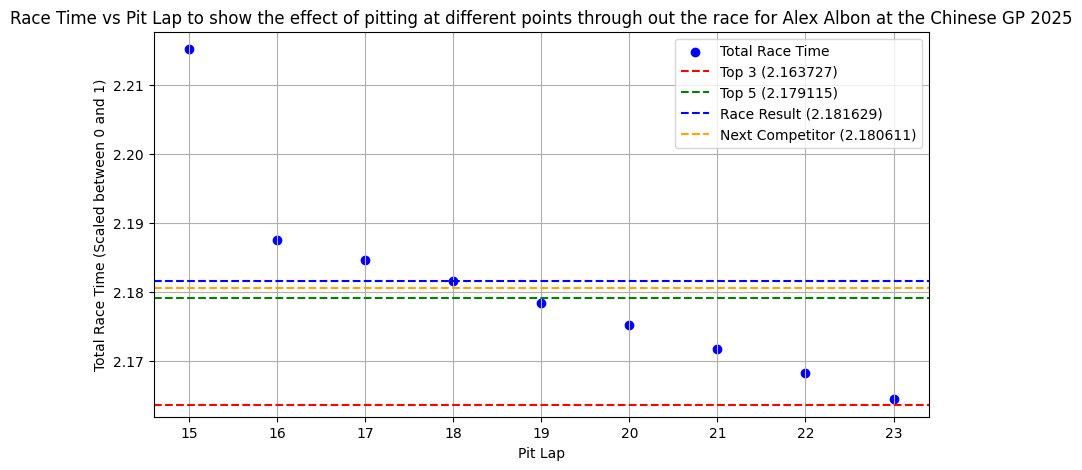

In [ ]:
laps = list(scaled_lap_time_total.keys())
times = list(scaled_lap_time_total.values())

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(laps, times, color='b', label="Total Race Time")  # Scatter plot instead of line plot

# Add horizontal reference lines
plt.axhline(y=2.163727, color='r', linestyle='--', label="Top 3 (2.163727)")
plt.axhline(y=2.179115, color='g', linestyle='--', label="Top 5 (2.179115)")
plt.axhline(y=2.181629, color='b', linestyle='--', label="Race Result (2.181629)")  # Race result line
plt.axhline(y=2.180611, color='orange', linestyle='--', label="Next Competitor (2.180611)")  # Next competitor line

# Labels and title
plt.xlabel("Pit Lap")
plt.ylabel("Total Race Time (Scaled between 0 and 1)")
plt.title("Race Time vs Pit Lap to show the effect of pitting at different points through out the race for Alex Albon at the Chinese GP 2025")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Struggling at the end - look at the effect of speed

Overtaking is more likely to happen on the straights so lets change SpeedST (float): Speedtrap on longest straight (Not sure) [km/h]

* Keep pit for consistancy.
* Times predicted speed by 2%/5%/10%/0%.

* Could help teams focus on part of the car to work on and what are the best trade offs.

In [ ]:
model.eval()  # Set the model to evaluation mode
TRY_PIT_AT = [38, 29, 40, 41, 42, 43, 44, 45, 46] # YUKI PITTED LAP 42 -4/+4

albon_china_2025 = case_study_set[1]
albon_china_2025 = albon_china_2025.to(device)

INDEX_MAPPING = {
      -8: 'compound_decision',
      0: 'lap_time',
      1: 'speedi1',
      2: 'speedi2',
      3: 'speedfl',
      4: 'speedst',
      5: 'speed_telemetry',
      -10: 'gear_telemetry',
      6: 'rpm_telemetry',
      7: 'throttle_telemetry',
      11: 'd_ahead',
      12: 'd_behind',
      # 13: 'pit_decision',
    }

lap_times_all = {'1.0': albon_china_2025[:, 0].tolist()}

h_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)
c_s = torch.zeros(NUM_LAYERS, 1, HIDDEN_SIZE).to(device)

current_lap = albon_china_2025[0, :].cpu()
current_lap = current_lap.to(device)

for SPEED_MULTI in [1.02, 1.05, 1.1]:
  lap_times = [albon_china_2025[0, 0].item()]
  for lap in range(albon_china_2025.shape[0] - 1):
      h_s, c_s, compound_decision, lap_time, speedi1, speedi2, speedfl, speedst, speed_telemetry, rpm_telemetry, gear_telemetry, throttle_telemetry, d_ahead, d_behind, _ = model(current_lap.unsqueeze(0).unsqueeze(0), h_s, c_s)
      speedst = speedst * SPEED_MULTI

      # Need up to date static information.
      previous_lap = current_lap.clone()
      current_lap = albon_china_2025[lap+1].clone()
      lap_times.append(lap_time.item() * 1.3977556791506554)

      # Start to prepare next laps inputs.
      for idx in INDEX_MAPPING.keys():
          autoregressed_value = locals()[INDEX_MAPPING[idx]]
          if idx == -8 or idx == -10:
            current_lap[idx] = torch.argmax(F.softmax(autoregressed_value, dim=-1), dim=-1).item()
          elif idx == 13:
            autoregressed_value = int(F.sigmoid(autoregressed_value).item() >= 0.5)
          else:
            current_lap[idx] = autoregressed_value.item()

      # Tyre Life variable calculation
      if previous_lap[13].item() == 1.0:
        current_lap[14] = 1.0
      else:
        current_lap[14] = previous_lap[14].item() + 1

      lap_times_all[str(SPEED_MULTI)] = lap_times

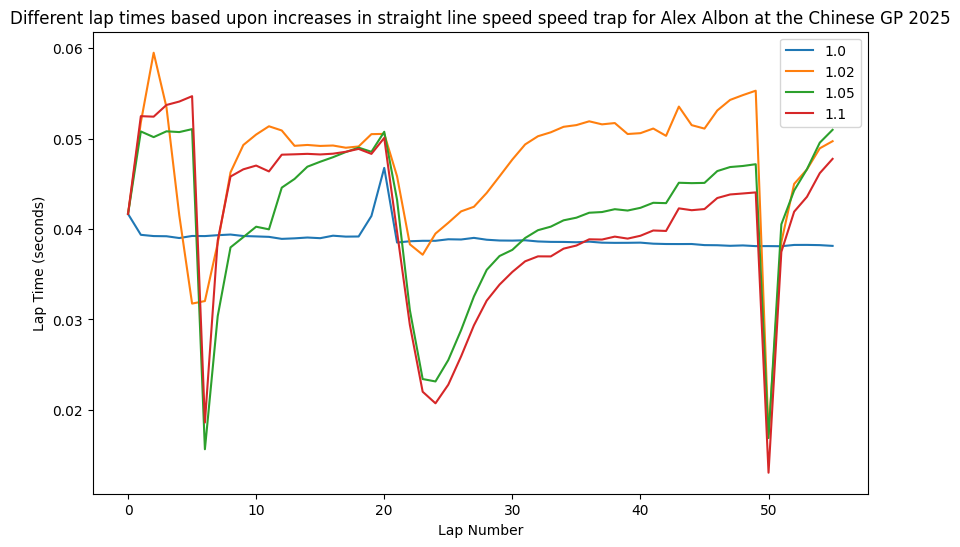

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Loop through the dictionary and plot each sequence
for speed_multipler in lap_times_all.keys():
    plt.plot(lap_times_all[speed_multipler], label=str(speed_multipler))

# Add labels and title
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.title('Different lap times based upon increases in straight line speed speed trap for Alex Albon at the Chinese GP 2025')

# Add legend to indicate which line corresponds to which driver
plt.legend()

# Show the plot
plt.show()